# Global AI Job Market & Salary Trends 2025  
## 🎯 Project Report – Targeted Analysis for SME Tech Recruiters

### Predictive Modeling
- Build a **salary prediction model** using variables such as skills, company size, job location, education, experience level, year, and job type.
- Quantify the **most influential factors** affecting compensation and explain their underlying patterns.

## Step 1 – Load and Inspect Dataset

We begin by importing the necessary Python libraries and reading the dataset from an Excel file. The first five rows are displayed to verify that the data has been loaded correctly and to gain an initial understanding of the structure and content.

In [1]:
import pandas as pd
import warnings

# Suppress unnecessary warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_excel(
    r'C:\Users\theha\OneDrive\Desktop\Projects\1. Global AI Job Market & Salary Trends 2025\Dataset\cleaned_data_by_Python_remove_value_999999_salary.xlsx'
)

# Preview the first 5 rows
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,posting_month,posting_year,posting_quarter,required_skills_filled
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,...,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,10,2024,2024Q4,"Tableau, PyTorch, Kubernetes, Linux, NLP"
1,AI00002,AI Software Engineer,102550.0,USD,EN,CT,Canada,M,Ireland,100,...,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,11,2024,2024Q4,"Deep Learning, AWS, Mathematics, Python, Docker"
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,...,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,3,2025,2025Q1,"Kubernetes, Deep Learning, Java, Hadoop, NLP"
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,...,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,12,2024,2024Q4,"Scala, SQL, Linux, Python"
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,...,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,4,2025,2025Q2,"MLOps, Java, Tableau, Python"


### Observation:

The dataset contains job-related information such as job title, salary, currency, experience level, employment type, and more.

Initial inspection helps verify that columns and data types match expectations before moving on to data cleaning.

## Step 2 – Select Features and Target Variable

To prepare the data for modeling, we separate the input features (X) from the target variable (y):

Selected features (X): job title, company size, company location, remote ratio, experience level, education required, years of experience, required skills, and industry.

Target variable (y): salary in USD.

In [2]:
# Define selected feature columns
selected_columns = [
    'job_title',
    'company_size',
    'company_location',
    'remote_ratio',
    'experience_level',
    'education_required',
    'years_experience',
    'required_skills_filled',
    'industry'
]

# Separate features (X) and target (y)
X = df[selected_columns].copy()
y = df['salary_usd'].copy()

# Check shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (14858, 9)
y shape: (14858,)


### Observation:

X has 14,858 rows and 9 columns.

y contains 14,858 salary values in USD.

## Step 3 – Encode Categorical Variables

Most machine learning models require numerical inputs. Therefore, we convert categorical variables into numeric form using One-Hot Encoding:

Categorical columns: job title, company size, company location, remote ratio, experience level, education required, and industry.

Encoder settings:

sparse_output=False → returns a dense NumPy array instead of a sparse matrix.

handle_unknown='ignore' → ignores categories not seen during training.

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = [
    'job_title',
    'company_size',
    'company_location',
    'remote_ratio',
    'experience_level',
    'education_required',
    'industry'
]

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical variables
X_encoded = ohe.fit_transform(X[categorical_cols])

# Get encoded feature names
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame and align index with X
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names, index=X.index)

In [4]:
print(X_encoded_df.shape)
X_encoded_df.head()

(14858, 69)


,job_title_AI Architect,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,job_title_Computer Vision Engineer,job_title_Data Analyst,job_title_Data Engineer,...,industry_Gaming,industry_Government,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Observation:

Each category in the selected columns is transformed into a binary feature (0 or 1).

The resulting DataFrame (X_encoded_df) is ready to be combined with numerical features for modeling.

## Step 4 – Combine Encoded and Numerical Features

After encoding the categorical features, we combine them with the remaining numerical features to create the complete feature set for modeling.

Numerical features used: years of experience, remote ratio.

Final dataset (X_partial) now contains both one-hot encoded features and untouched numerical variables.

In [5]:
# Select remaining numerical features
X_numeric = X[['years_experience', 'remote_ratio']].copy()

# Combine encoded categorical features with numerical features
X_partial = pd.concat([X_encoded_df, X_numeric], axis=1)

# Check the shape and preview data
print(f"X_partial shape: {X_partial.shape}")
X_partial.head()

X_partial shape: (14858, 71)


,job_title_AI Architect,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,job_title_Computer Vision Engineer,job_title_Data Analyst,job_title_Data Engineer,...,industry_Healthcare,industry_Manufacturing,industry_Media,industry_Real Estate,industry_Retail,industry_Technology,industry_Telecommunications,industry_Transportation,years_experience,remote_ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,50
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,100
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,50
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,100


### Observation:

The final dataset has 14,858 rows and 71 columns after combining features.

This feature set is ready for further preprocessing such as scaling or train-test splitting.

## Step 5 – Encode Skills Data

The required_skills_filled column contains multiple skills in a comma-separated format.
To make these skills usable for modeling, we apply CountVectorizer to transform them into binary features indicating the presence or absence of each skill.

Tokenizer: splits the text by ", " to separate skills.

Output: each unique skill becomes a separate column with binary values (0 = absent, 1 = present).

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for skills
skill_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))

# Fit and transform skills column
skill_matrix = skill_vectorizer.fit_transform(X['required_skills_filled'])

# Convert to DataFrame and align index
skill_df = pd.DataFrame(
    skill_matrix.toarray(),
    columns=skill_vectorizer.get_feature_names_out(),
    index=X.index
)

# Check shape and preview
print(f"skill_df shape: {skill_df.shape}")
skill_df.head()

skill_df shape: (14858, 24)


,aws,azure,computer vision,data visualization,deep learning,docker,gcp,git,hadoop,java,...,nlp,python,pytorch,r,scala,spark,sql,statistics,tableau,tensorflow
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


### Observation:

The skills data has been transformed into 24 binary columns.

Each column corresponds to a specific skill (e.g., aws, azure, deep learning).

## Step 6 – Combine All Features

At this stage, we combine all processed features into the final dataset:

X_partial – contains one-hot encoded categorical variables and selected numerical features.

skill_df – contains binary skill features from the required_skills_filled column.

The combined dataset (X_final) will be used as the input for machine learning models.

In [7]:
# Combine all features into final dataset
X_final = pd.concat([X_partial, skill_df], axis=1)

# Check shape and preview
print(f"X_final shape: {X_final.shape}")
X_final.head()

X_final shape: (14858, 95)


,job_title_AI Architect,job_title_AI Consultant,job_title_AI Product Manager,job_title_AI Research Scientist,job_title_AI Software Engineer,job_title_AI Specialist,job_title_Autonomous Systems Engineer,job_title_Computer Vision Engineer,job_title_Data Analyst,job_title_Data Engineer,...,nlp,python,pytorch,r,scala,spark,sql,statistics,tableau,tensorflow
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,1,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


### Observation:

The final dataset has 14,858 rows and 95 columns.

All features are now numerical, making them ready for model training.

## Step 7 – Train-Test Split

To evaluate the model’s performance, we split the dataset into training and testing sets:

Training set: 80% of the data, used to train the model.

Testing set: 20% of the data, used to evaluate model performance.

random_state=42 ensures reproducibility.

In [8]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# Check dataset shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (11886, 95), X_test: (2972, 95)
y_train: (11886,), y_test: (2972,)


### Observation:

X_train: 11,886 rows × 95 columns

X_test: 2,972 rows × 95 columns

The split ensures that both sets maintain the same feature structure.

## Step 8 – Data Cleaning and Model Training

Before training the model, we ensure that the years_experience column is properly cleaned and converted to numeric format:

Replace invalid values: Any 'Unknown' entries are replaced with NaN.

Remove missing values: Rows with missing years_experience are dropped.

Convert data type: years_experience is cast to float.

Synchronize target variable: Ensure that y aligns with the filtered X_final.

Split into train/test sets: 80% training, 20% testing.

Train the model: We use a Random Forest Regressor with random_state=42 for reproducibility.

In [9]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Replace 'Unknown' with NaN
X_final['years_experience'] = X_final['years_experience'].replace('Unknown', pd.NA)

# 2. Drop rows with missing 'years_experience'
X_final = X_final.dropna(subset=['years_experience'])

# 3. Convert to float
X_final['years_experience'] = X_final['years_experience'].astype(float)

# 4. Sync target variable with filtered X
y = y.loc[X_final.index]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# 6. Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Observation:

The dataset is now clean and ready for modeling.

Random Forest is chosen due to its robustness in handling mixed feature types and non-linear relationships.

## Step 9 – Model Evaluation

After training the Random Forest Regressor, we evaluate its performance using common regression metrics:

MAE (Mean Absolute Error): Average absolute difference between predicted and actual values.

RMSE (Root Mean Squared Error): Penalizes larger errors more heavily.

R² Score: Proportion of variance in the target variable explained by the model.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

MAE: 16,918.13
RMSE: 24,792.41
R²: 0.8269


### Interpretation:

The model explains approximately 82.7% of the variance in salary prediction.

Both MAE and RMSE values indicate that the model predictions are relatively close to the actual salaries, with RMSE slightly higher due to larger errors being penalized.

## Step 10 – Feature Importance Analysis

To understand which variables most influence salary predictions, we extract and rank feature importances from the trained Random Forest Regressor.

Feature Importance: Measures how much each variable contributes to reducing prediction error in the model.

Output: A sorted DataFrame showing the top 15 most important features.

In [11]:
# Get feature names
feature_names = X_train.columns

# Extract feature importances from the model
importances = model.feature_importances_

# Create DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 15 features
importance_df.head(15)

,Feature,Importance
69,years_experience,0.303699
47,experience_level_EX,0.221441
40,company_location_Switzerland,0.051235
49,experience_level_SE,0.046282
27,company_location_Denmark,0.038734
20,company_size_L,0.033655
36,company_location_Norway,0.031797
42,company_location_United States,0.025235
41,company_location_United Kingdom,0.011477
37,company_location_Singapore,0.010645


### Interpretation:

Experience-related features (years_experience and experience_level) have the strongest impact on salary predictions.

Geographic factors (e.g., Switzerland, Denmark, Norway) also play a significant role, highlighting the influence of location on compensation.

## Step 11 – Visualizing Top 15 Influential Features

To better interpret feature importance, we visualize the top 15 most influential features in a horizontal bar chart.

X-axis: Importance Score – indicates the contribution of each feature to salary prediction.

Y-axis: Feature names – sorted so the most important features appear at the top.

Color: Steel blue for clear visual contrast.

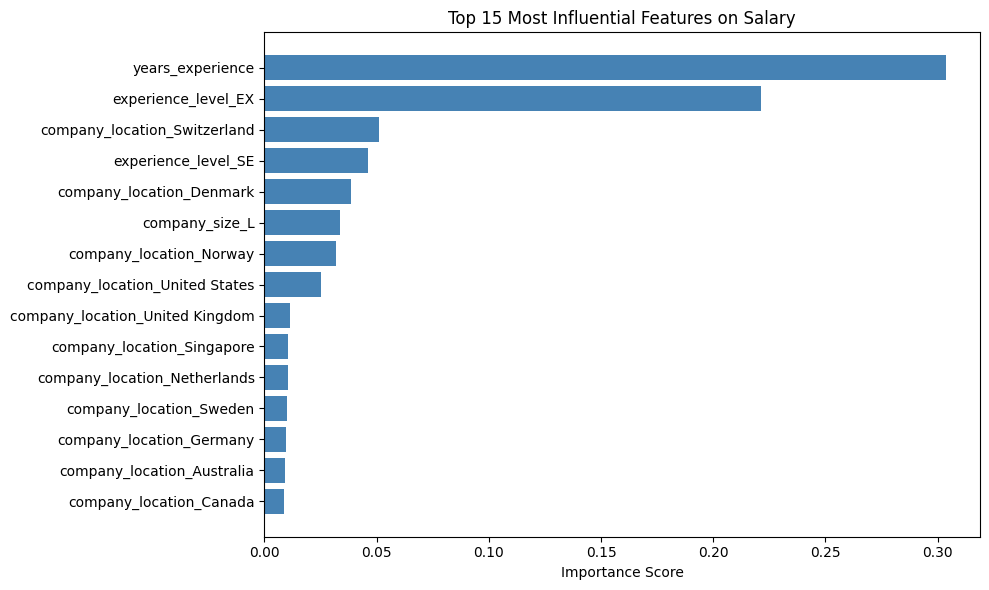

In [12]:
import matplotlib.pyplot as plt

# Select top 15 features
top_features = importance_df.head(15)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Most Influential Features on Salary')
plt.gca().invert_yaxis()  # Display most important at the top
plt.tight_layout()
plt.show()

### Observation:

Years of experience and Experience level (Executive) are far more important than other features.

Company location in high-paying countries (e.g., Switzerland, Denmark, Norway, United States) significantly influences salary levels.

Non-location categorical features (e.g., Company size: Large) also have noticeable impact.